In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import glob
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
import os
import sys

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from qubit_network.QubitNetwork import QubitNetwork
import qubit_network as qn
import qubit_network.net_analysis_tools as nat
import utils
from utils import chop

In [3]:
qn.load_network_from_file('../data/nets/toffredkin_3q+1a_0.9999fid.pickle').test_fidelity_without_theano(n_samples=100)

0.99998058111761989

In [28]:
filename = glob.glob('../data/nets/ccS*pickle')[0]
foo = qn.load_network_from_file(filename)
foo.target_gate

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+1.j]]

In [29]:
qutip.qip.gates.controlled_gate(qutip.hadamard_transform())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.          0.          0.70710678 -0.70710678]]

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


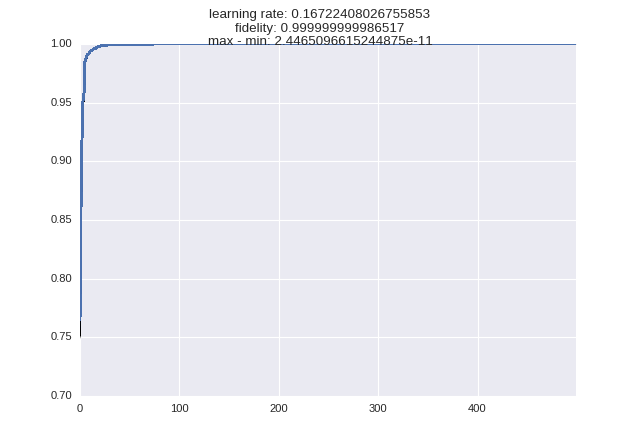

Finished training
Final fidelity: 0.999999999985572


In [32]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=ccH,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


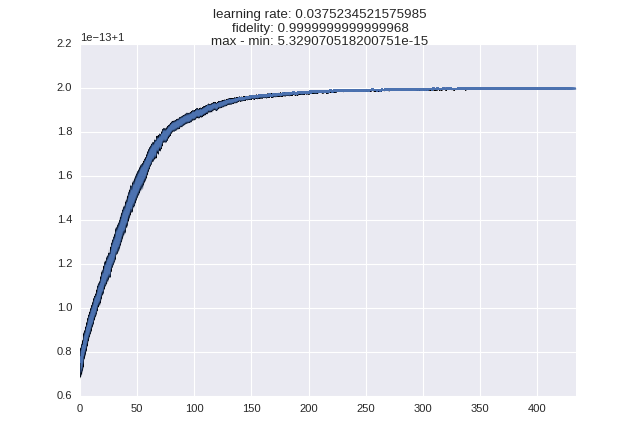

Finished training
Final fidelity: 0.9999999999999967


In [38]:
qn.sgd_optimization(
    net=net,
    learning_rate=.2,
    n_epochs=1000,
    batch_size=10,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [31]:
ccH = (qutip.tensor(qutip.projection(2, 0, 0), qutip.qeye(2), qutip.qeye(2)) +
 qutip.tensor(qutip.projection(2, 1, 1), qutip.qip.gates.controlled_gate(qutip.hadamard_transform())))
ccH

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          1.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          1.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.70710678  0.70710678]
 [ 0.          0.          0.          0.          0.          0.
   0.70710678 -0.70710678]]

In [14]:
foo = qn.load_network_from_file('../data/nets/fredkin_Banchietal.pickle')
foo.net_topology
foo.get_interactions_with_Js()

OrderedDict([((((0, 1), 'xx'), ((0, 2), 'xx')), 3.4007968843790977),
             ((((1, 2), 'xx'), ((1, 2), 'yy'), ((1, 2), 'zz')),
              -1.1780971280089156),
             ((((1, 3), 'xx'), ((2, 3), 'xx')), 2.1001559900456868),
             ((((0, 1), 'zz'), ((0, 2), 'zz')), 2.7879530743415528),
             (((3, 'x'),), 0.51250000000000062),
             (((0, 'z'),), 1.5707780801954478)])

In [13]:
foo = qn.load_network_from_file('../data/nets/fredkin_3q+1a_paperTopology_1fid.pickle')
foo.test_fidelity_without_theano(n_samples=100)
foo.get_interactions_with_Js()

OrderedDict([((((0, 1), 'xx'), ((0, 2), 'xx')), 9.7386206537643396),
             ((((1, 2), 'xx'), ((1, 2), 'yy'), ((1, 2), 'zz')),
              9.8174770429623806),
             ((((1, 3), 'xx'), ((2, 3), 'xx')), 9.1573898031317178),
             ((((0, 1), 'zz'), ((0, 2), 'zz')), 10.734553583302334),
             (((3, 'x'),), 9.9999605511022231),
             (((0, 'z'),), 10.995573810037756)])

In [4]:
qutip.hadamard_transform().data.toarray().real

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [57]:
import scipy
eigvalues, eigvecs = scipy.linalg.eig(qutip.sigmax().data.toarray().real)
np.dot(eigvecs, np.diag(eigvalues)).dot(eigvecs.T)

array([[ 0.+0.j,  1.+0.j],
       [ 1.+0.j,  0.+0.j]])

In [5]:
qutip.sprepost(qutip.sigmax(), qutip.hadamard_transform())

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.         -0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]]

In [14]:
qutip.tensor(qutip.sigmax(), qutip.hadamard_transform())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.70710678  0.70710678]
 [ 0.          0.          0.70710678 -0.70710678]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]]

In [18]:
qutip.operator_to_vector(qutip.ket2dm(qutip.basis(2, 0)) + qutip.ket2dm(qutip.basis(2, 1)))

Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 1.]]

In [58]:
qutip.tensor(*([qutip.sigmax()] * 3))

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]]

In [7]:
pre = qutip.tensor(*([qutip.sigmax()] * 3))
post = pre
open_map = qutip.sprepost(pre, post)
open_map

Quantum object: dims = [[[2, 2, 2], [2, 2, 2]], [[2, 2, 2], [2, 2, 2]]], shape = (64, 64), type = super, isherm = True
Qobj data =
[[ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]

In [104]:
open_map = qutip.sprepost(qutip.sigmax(), qutip.sigmax())
foo = open_map.data.toarray()
foo

array([[ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

In [116]:
# foo = qutip.tensor(qutip.fock_dm(2), qutip.fock_dm(2))

qutip.Qobj(foo, dims=open_map.dims, superrep='super')

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]]

In [13]:
num_system_qubits = 1
pre = qutip.tensor(*([qutip.sigmax()] * num_system_qubits))
post = pre
open_map = qutip.sprepost(pre, post)

net = QubitNetwork(
    num_qubits=num_system_qubits + 1,
    system_qubits=num_system_qubits,
    interactions='all',
    target_gate=open_map,
    ancillae_state=qutip.basis(2, 0)
)

out = net.generate_training_data(size=2)
out

(array([[-0.40185255,  0.        ,  0.82713776,  0.        , -0.37651889,
          0.        , -0.11221046,  0.        ],
        [ 0.52053855,  0.        ,  0.4381632 ,  0.        ,  0.6695053 ,
          0.        ,  0.29801892,  0.        ]]),
 array([[[ 0.69674805, -0.29013806, -0.        , -0.35652505],
         [-0.29013806,  0.30325195,  0.35652505, -0.        ],
         [ 0.        ,  0.35652505,  0.69674805, -0.29013806],
         [-0.35652505,  0.        , -0.29013806,  0.30325195]],
 
        [[ 0.28080227,  0.42760608, -0.        ,  0.13822225],
         [ 0.42760608,  0.71919773, -0.13822225, -0.        ],
         [ 0.        , -0.13822225,  0.28080227,  0.42760608],
         [ 0.13822225,  0.        ,  0.42760608,  0.71919773]]]))

In [17]:
??qn.sgd_optimization

In [20]:
net = QubitNetwork(
    num_qubits=2,
    system_qubits=1,
    interactions='all'
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=open_map,
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)[0]

Generating training data...


array([[ 0.18934548,  0.18115052, -0.        , -0.34738776],
       [ 0.18115052,  0.81065452,  0.34738776, -0.        ],
       [ 0.        ,  0.34738776,  0.18934548,  0.18115052],
       [-0.34738776,  0.        ,  0.18115052,  0.81065452]])

In [32]:
ket = qutip.basis(2, 0) + qutip.basis(2, 1)
ket = ket.unit()
dm = qutip.ket2dm(ket)
dm2 = qutip.sprepost(qutip.sigmax(), qutip.sigmax()) * qutip.operator_to_vector(dm)
# qutip.vector_to_operator(dm2)
qutip.vector_to_operator(dm2)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0.5]
 [ 0.5  0.5]]

In [60]:
A = T.cmatrix('A')

eigenvalues, eigenvectors = T.nlinalg.eig(A)
# sqrtA = T.dot(eigenvectors, T.sqrt(eigenvalues))
sqrtA = T.dot(eigenvectors, T.sqrt(T.diag(eigenvalues)))
sqrtA = T.dot(sqrtA, eigenvectors.T)

f = theano.function(inputs=[A], outputs=sqrtA)
f([[0., 1.], [1., 0.]])

array([[ 0.49999997+0.49999997j,  0.49999997-0.49999997j],
       [ 0.49999997-0.49999997j,  0.49999997+0.49999997j]], dtype=complex64)